# Import libraries and Read CSV

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Training Data.csv')
df_test = pd.read_csv('Testing Data.csv')

# Data Exploration, Data Cleaning, Data Manipulation on training data

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df_train.shape

(614, 13)

In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
print("Unique Values in Label:",df_train['Loan_Status'].unique())
print()

Unique Values in Label: ['Y' 'N']



In [11]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
print("Unique Values in Gender:",df_train['Gender'].unique())
print()

Unique Values in Gender: ['Male' 'Female' nan]



In [13]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
print("Unique Values in Married:",df_train['Married'].unique())
print()

Unique Values in Married: ['No' 'Yes' nan]



In [15]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
print("Unique Values in Dependents:",df_train['Dependents'].unique())
print()

Unique Values in Dependents: ['0' '1' '2' '3+' nan]



In [17]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
print("Unique Values in Self_Employed:",df_train['Self_Employed'].unique())
print()

Unique Values in Self_Employed: ['No' 'Yes' nan]



In [19]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
df_train['LoanAmount'].mean()

146.41216216216216

In [21]:
print("Unique Values in Credit_History:",df_train['Credit_History'].unique())
print()

Unique Values in Credit_History: [ 1.  0. nan]



In [22]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
print("Unique Values in Loan_Amount_Term:",df_train['Loan_Amount_Term'].unique())
print()

Unique Values in Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]



In [24]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
df_train['Gender'] = df_train['Gender'].fillna('Male')
df_train['Married'] = df_train['Married'].fillna('Yes')
df_train['Dependents'] = df_train['Dependents'].fillna('0')
df_train['Self_Employed'] = df_train['Self_Employed'].fillna('No')
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Credit_History'] = df_train['Credit_History'].fillna(1)
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(360)

In [26]:
for i in range(df_train.shape[0]):
    if df_train['Dependents'].iloc[i] == '0':
        df_train['Dependents'].iloc[i] = 'Zero'
    elif df_train['Dependents'].iloc[i] == '1':
        df_train['Dependents'].iloc[i] = 'One'
    elif df_train['Dependents'].iloc[i] == '2':
        df_train['Dependents'].iloc[i] = 'Two'
    elif df_train['Dependents'].iloc[i] == '3+':
        df_train['Dependents'].iloc[i] = 'Three or More'

In [27]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df_train['ApplicantIncome'] = df_train['ApplicantIncome'].astype(int)
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].astype(int)
df_train['LoanAmount'] = df_train['LoanAmount'].astype(int)
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype(int)
df_train['Credit_History'] = df_train['Credit_History'].astype(int)

In [29]:
df_train.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [30]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Zero,Graduate,No,5849,0,146,360,1,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,Zero,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,Zero,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,Zero,Graduate,No,6000,0,141,360,1,Urban,Y


In [31]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,Zero,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,Three or More,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,One,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,Two,Graduate,No,7583,0,187,360,1,Urban,Y
613,LP002990,Female,No,Zero,Graduate,Yes,4583,0,133,360,0,Semiurban,N


In [32]:
df_train.to_csv('Clean Train Data.csv',index=False)

# Data Visulization of train data

<AxesSubplot:>

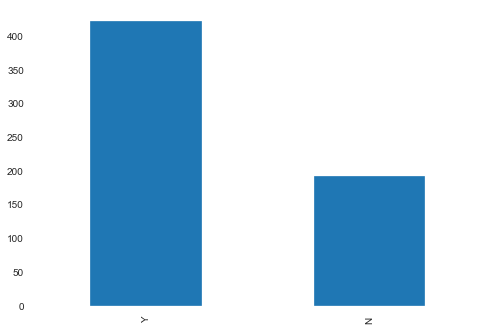

In [33]:
df_train['Loan_Status'].value_counts().plot.bar()

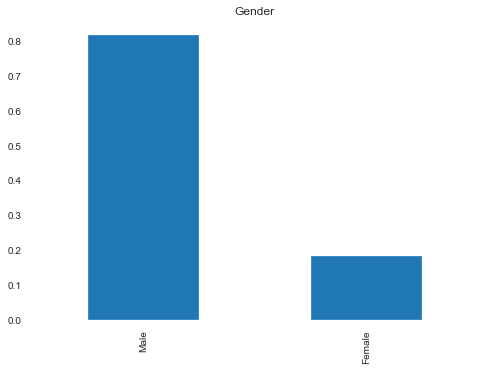

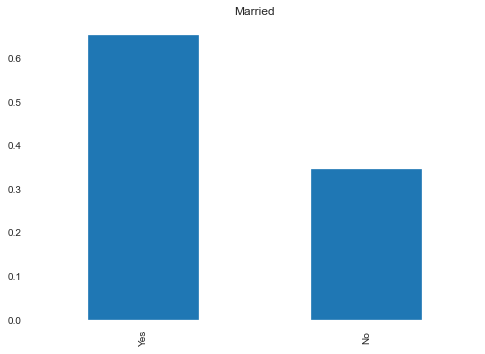

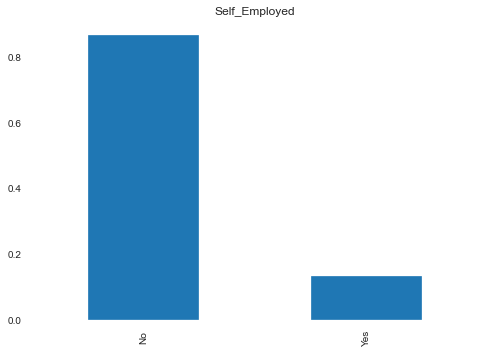

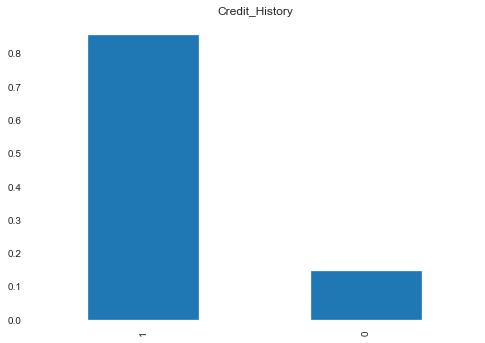

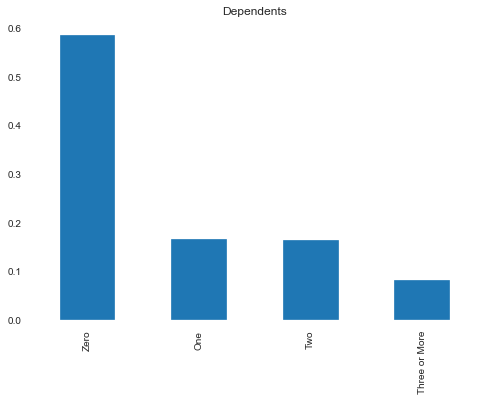

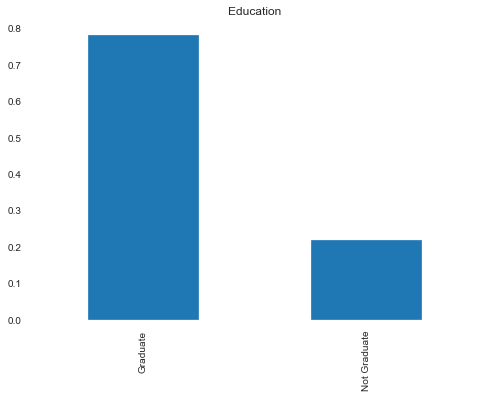

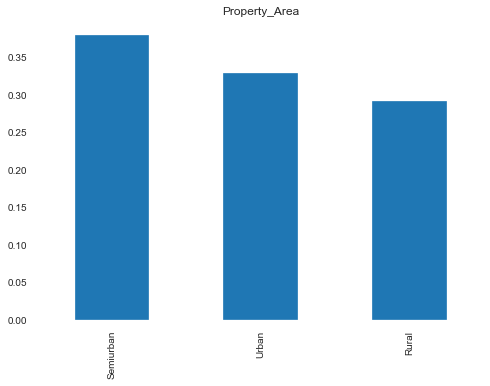

In [34]:
df_train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
df_train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()
df_train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
df_train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Text(0.5, 0.98, '')

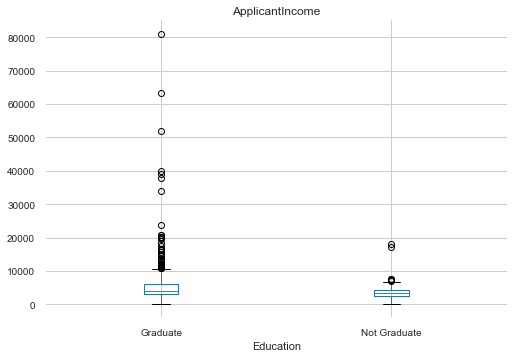

In [35]:
df_train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

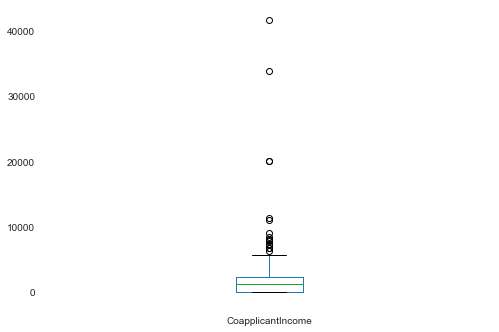

In [36]:
df_train['CoapplicantIncome'].plot.box()
plt.show()

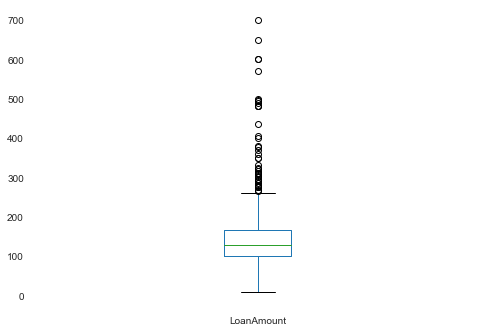

In [37]:
df_train['LoanAmount'].plot.box()
plt.show()

<AxesSubplot:>

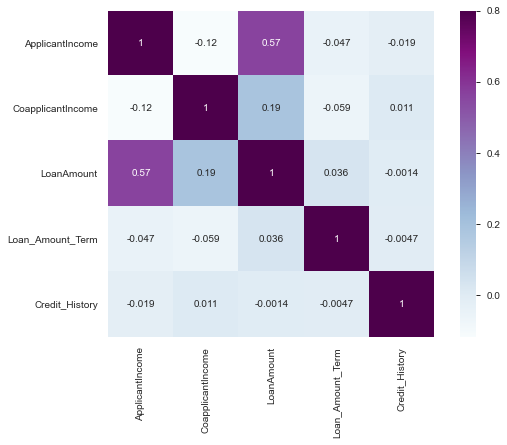

In [38]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [39]:
profile = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)

In [40]:
profile

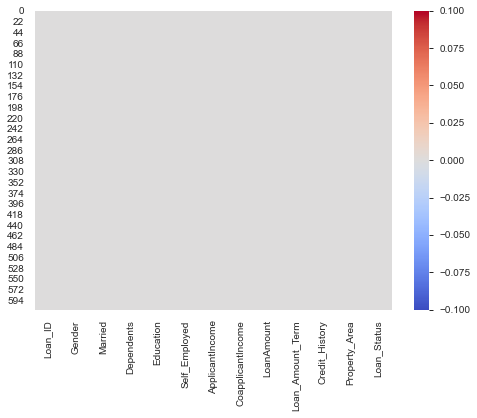

In [41]:
sns.heatmap(df_train.isnull(),cmap="coolwarm")
plt.show()

# Perform Data Exploration, Data Cleaning, Data Manipulation of Test data

In [42]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [44]:
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [45]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [47]:
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [48]:
df_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [49]:
df_test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [50]:
df_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
df_test['Gender'] = df_test['Gender'].fillna('Male')
df_test['Dependents'] = df_test['Dependents'].fillna('0')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna('No')
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Credit_History'] = df_test['Credit_History'].fillna(1)
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(360)

In [53]:
for i in range(df_test.shape[0]):
    if df_test['Dependents'].iloc[i] == '0':
        df_test['Dependents'].iloc[i] = 'Zero'
    elif df_test['Dependents'].iloc[i] == '1':
        df_test['Dependents'].iloc[i] = 'One'
    elif df_test['Dependents'].iloc[i] == '2':
        df_test['Dependents'].iloc[i] = 'Two'
    elif df_test['Dependents'].iloc[i] == '3+':
        df_test['Dependents'].iloc[i] = 'Three or More'

In [54]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
df_test['ApplicantIncome'] = df_test['ApplicantIncome'].astype(int)
df_test['CoapplicantIncome'] = df_test['CoapplicantIncome'].astype(int)
df_test['LoanAmount'] = df_test['LoanAmount'].astype(int)
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].astype(int)
df_test['Credit_History'] = df_test['Credit_History'].astype(int)

In [56]:
df_test.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
dtype: object

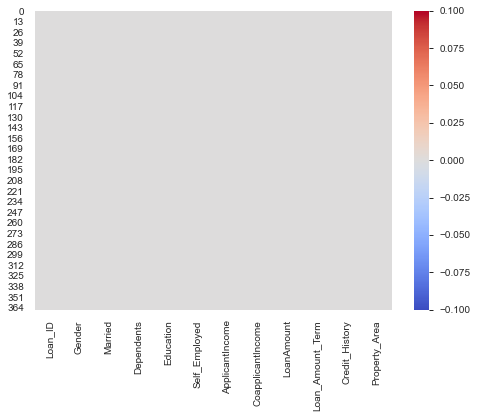

In [57]:
sns.heatmap(df_test.isnull(),cmap="coolwarm")
plt.show()

In [58]:
df_test.to_csv('Clean Test Data.csv',index=False)

# Pre-processing

In [59]:
#To change catagorical records to numarcal record
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train[df_train.select_dtypes(include=['object']).columns] = df_train[df_train.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [60]:
le=LabelEncoder()
df_test[df_test.select_dtypes(include=['object']).columns] = df_test[df_test.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [61]:
X_train=df_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_train=df_train[['Loan_Status']]
X_test=df_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [62]:
print(X_train)
print(y_train)
print(X_test)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           3          0              0   
1          1       1        1           0          0              0   
2          2       1        1           3          0              1   
3          3       1        1           3          1              0   
4          4       1        0           3          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           3          0              0   
610      610       1        1           1          0              0   
611      611       1        1           0          0              0   
612      612       1        1           2          0              0   
613      613       0        0           3          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                  0         146               360   
1

# model Building

# Decision Tree

In [63]:
#to import and initiate DecisionTree function
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [64]:
#training model with train data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV
parameters={"max_depth" : [1,3,5,7,9,11,13,15,17,19],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
           }

In [66]:
tuning_model=GridSearchCV(dt_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [67]:
tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1, score=-0.200, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_sa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_weight_fraction_leaf=

[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_weight_fraction_leaf=0.7 ...
[

[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=1, min_samples_leaf=7, min_weight_fraction_leaf=

[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=1, min_samples_leaf=9, min_weight_fraction_leaf=0.8 ...
[CV]  max_

[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=2, min_weight_fraction_leaf=

[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=3, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ...
[CV]  max_

[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=3, min_samples_leaf=7, min_weight_fraction_leaf=

[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=3, min_samples_leaf=10, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=3, min_samples_leaf=10, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_weight_fraction_leaf=0.8 ...
[CV]  max_

[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=

[CV]  max_depth=5, min_samples_leaf=7, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=7, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=5, min_samples_leaf=7, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1, score=-0.200, total=   0.0s
[CV] max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=8, min_weight_fraction_leaf=0.2 ..

[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_weight_fraction_leaf=0.

[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=3, min_weight_fraction_leaf=

[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ...
[CV]  max_

[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5 ...
[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=7, min_samples_leaf=8, min_weight_fraction_leaf=0.6

[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.1 ...
[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2 ...
[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=1, min_weight_fraction_leaf=

[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.6 ...
[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7 ...
[CV]  max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.8 ...
[CV]  max_

[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3 ...
[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.4 ...
[CV]  max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=9, min_samples_leaf=6, min_weight_fraction_leaf=

[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8 ...
[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.9 ...
[CV]  max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=9, min_samples_leaf=8, min_weight_fraction_leaf=0.9 ...
[CV]  max_

[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=11, min_samples_leaf=1, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=11, min_samples_leaf=1, min_weight_fractio

[CV]  max_depth=11, min_samples_leaf=3, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=3, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=11, min_samples_leaf=3, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=3, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=11, min_samples_leaf=3, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1, score=-0.200, total=   0.0s
[CV] max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=11, min_samples_leaf=4, min_weight_fraction_leaf=0.

[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=11, min_samples_leaf=6, min_weight_fraction_leaf=0.

[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=11, min_samples_leaf=9, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=11, min_samples_leaf=9, min_weight_fractio

[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=1, min_weight_fraction_leaf=0.8 ..
[CV]

[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=13, min_samples_leaf=4, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=4, min_weight_fractio

[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=13, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=13, min_samples_leaf=7, min_weight_fractio

[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=13, min_samples_leaf=9, min_weight_fraction_leaf=0.7 ..
[

[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_weight_fractio

[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=15, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_weight_fraction_leaf=0.1 ..
[CV]

[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=15, min_samples_leaf=7, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_weight_fractio

[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.1, score=-0.200, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.1 .
[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.1, score=-0.205, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.1 .
[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2 .
[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2 .
[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2 .
[CV]  max_depth=15, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_weight_

[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=2, min_weight_fraction_leaf

[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=17, min_samples_leaf=4, min_weight_fraction_leaf=0.9 ..
[CV]

[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=17, min_samples_leaf=7, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=7, min_weight_fractio

[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4 ..
[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.4, score=-0.314, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=17, min_samples_leaf=9, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=17, min_samples_leaf=9, min_weight_fractio

[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.5, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.5 ..
[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.5, score=-0.314, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6 ..
[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.6, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=1, min_weight_fraction_leaf=0.7 .

[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.7 ..
[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.7, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=3, min_weight_fraction_leaf=0.9 ..
[CV]

[CV]  max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.8 ..
[CV]  max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.8, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9 ..
[CV]  max_depth=19, min_samples_leaf=5, min_weight_fraction_leaf=0.9, score=nan, total=   0.0s
[CV] max_depth=19, min_samples_leaf=6, min_weight_fraction_leaf=0.1 ..
[CV]  max_depth=19, min_samples_leaf=6, min_weight_fraction_leaf=0.1, score=-0.200, total=   0.0s
[CV] max_depth=19, min_samples_leaf=6, min_weight_fraction_leaf=0.1 ..
[

[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.1, score=-0.167, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2 ..
[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.3 ..
[CV]  max_depth=19, min_samples_leaf=8, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=8, min_weight_fractio

[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.2 .
[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.2 .
[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.2, score=-0.314, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3 .
[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3 .
[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3, score=-0.312, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3 .
[CV]  max_depth=19, min_samples_leaf=10, min_weight_fraction_leaf=0.3, score=-0.314, total=   0.0s
[CV] max_depth=19, min_samples_leaf=10, min_weight_

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:   14.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=3)

In [68]:
tuning_model.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1}

In [69]:
dt_model = DecisionTreeClassifier(max_depth= 1, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_weight_fraction_leaf=0.1)

In [70]:
#predicting values over test dataset
pred_dt= dt_model.predict(X_test)

In [71]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt_model, DT_Model_pkl)
DT_Model_pkl.close()

In [72]:
new_df_test = pd.read_csv('Clean Test Data.csv')

In [73]:
newdf = pd.DataFrame()

In [74]:
newdf['Loan_ID'] = new_df_test['Loan_ID']
newdf['Gender'] = new_df_test['Gender']
newdf['Married'] = new_df_test['Married']
newdf['Dependents'] = new_df_test['Dependents']
newdf['Education'] = new_df_test['Education']
newdf['Self_Employed'] = new_df_test['Self_Employed']
newdf['ApplicantIncome'] = new_df_test['ApplicantIncome']
newdf['CoapplicantIncome'] = new_df_test['CoapplicantIncome']
newdf['LoanAmount'] = new_df_test['LoanAmount']
newdf['Loan_Amount_Term'] = new_df_test['Loan_Amount_Term']
newdf['Credit_History'] = new_df_test['Credit_History']
newdf['Property_Area'] = new_df_test['Property_Area']
newdf['Loan_Status'] = pred_dt

In [75]:
newdf.to_csv('dt.csv',index=False)

# Questions and Answer

In [76]:
df_train1 = pd.read_csv("Clean Train Data.csv")
df_test1 = pd.read_csv("Clean Test Data.csv")

# What's the ratio of Male to Female?

In [77]:
df_train1["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [78]:
# df_train[df_train['Gender'] == 'Male']['Gender'].count()

In [79]:
print("ratio of Male and Female:-" , df_train1[df_train1['Gender'] == 'Male']["Gender"].count()/df_train1[df_train1['Gender'] == 'Female']["Gender"].count())

ratio of Male and Female:- 4.482142857142857


# How many Males are married and non-married?

In [80]:
df_train1[(df_train1['Gender']=='Male')&(df_train1['Married']=='Yes')].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Male    Yes        369
Name: Married, dtype: int64

In [81]:
df_train1[(df_train1['Gender']=='Male')&(df_train1['Married']=='No')].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Male    No         133
Name: Married, dtype: int64

# How many Females are married and non-married?

In [82]:
df_train1[(df_train1['Gender']=='Female')&(df_train1['Married']=='Yes')].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Female  Yes        32
Name: Married, dtype: int64

In [83]:
df_train1[(df_train1['Gender']=='Female')&(df_train1['Married']=='No')].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Female  No         80
Name: Married, dtype: int64

# How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [84]:
df_train1.groupby(['Gender', 'Education','Married'])['Married'].count()

Gender  Education     Married
Female  Graduate      No          66
                      Yes         26
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No         102
                      Yes        286
        Not Graduate  No          31
                      Yes         83
Name: Married, dtype: int64

# Which type of encoding will be required to perform on the "Education" column?

# Is it a male or a female whose loan amount is the highest?

In [85]:
# df_train1[df_train1["LoanAmount"] == df_train1["LoanAmount"].max()]["Gender"]
# df_train1[df_train1["LoanAmount"] == df_train1["LoanAmount"].max()].index[0]

In [86]:
df_train1.loc[[df_train1[df_train1["LoanAmount"] == df_train1["LoanAmount"].max()].index[0]],['Gender','LoanAmount']]

,Gender,LoanAmount
171,Male,700


# the specification and information about the applicant who has the highest income?

In [87]:
df_train1[df_train1["ApplicantIncome"] == df_train1["ApplicantIncome"].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,Three or More,Graduate,No,81000,0,360,360,0,Rural,N


# What all features are you going to consider for the model training and why?

# Which model are you going to choose and define the reason for going with the same model?

# Have you performed the Hyper Parameter Tuning?

# Compare the Actual results with the Predicted results

In [88]:
cmp_train = pd.read_csv('Clean Train Data.csv')
cmp_test = pd.read_csv('dt.csv')
# To change catagorical records to numarcal record
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cmp_train[cmp_train.select_dtypes(include=['object']).columns] = cmp_train[cmp_train.select_dtypes(include=['object']).columns].apply(le.fit_transform)
cmp_test[cmp_test.select_dtypes(include=['object']).columns] = cmp_test[cmp_test.select_dtypes(include=['object']).columns].apply(le.fit_transform)
# feature selection
X_train_cmp=cmp_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_train_cmp=cmp_train[['Loan_Status']]
X_test_cmp=cmp_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_test_cmp=cmp_test[['Loan_Status']]
# model
dt_cmp = DecisionTreeClassifier(max_depth= 1, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1)
dt_cmp.fit(X_train_cmp, y_train_cmp)
cmp_pred_dt= dt_cmp.predict(X_test_cmp)

In [89]:
cmp = pd.read_csv('dt.csv')
cmp_df = pd.DataFrame()
cmp_df["Loan_ID"] = cmp["Loan_ID"]
cmp_df["Actual_Result"] = cmp_test["Loan_Status"]
cmp_df["Predicted_Result"] = cmp_pred_dt
cmp_df.to_csv("Compare Result.csv",index = False)

In [90]:
cmp_df.head(10)

,Loan_ID,Actual_Result,Predicted_Result
0,LP001015,1,1
1,LP001022,1,1
2,LP001031,1,1
3,LP001035,1,1
4,LP001051,1,1
5,LP001054,1,1
6,LP001055,1,1
7,LP001056,0,0
8,LP001059,1,1
9,LP001067,1,1


# What's the accuracy of your model?

In [91]:
x = metrics.accuracy_score(y_test_cmp, cmp_pred_dt)
print(" Accuracy is: ", x*100)

 Accuracy is:  100.0


# What can you conclude with respect to the data?

In [ ]:
# ---------------------------------------------------------END------------------------------------------------------------------